<a href="https://colab.research.google.com/github/cauancalmeida/Data_Science_studies/blob/main/Limpeza_e_tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt_telecom = requests.get('https://cdn3.gnarususercontent.com.br/2929-pandas/dataset-telecon.json')

In [3]:
json_telecom = json.loads(dt_telecom.text)

In [4]:
dados = pd.json_normalize(json_telecom)
dados

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875
7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25
7342,3601-UTZXO,,masculino,0,sim,sim,41.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,transferencia bancaria (automatica),19.50,798.2


# Tratando dados

##Dicionario dos dados:

### Cliente:

* genero: gênero (masculino e feminino)
* idoso: informação sobre um(a) cliente ter ou não idade igual ou maior que 65 anos
* parceiro: se o(a) cliente possui ou não um(a) parceiro ou parceira
* dependentes: se o(a) cliente possui ou não dependentes
* tempo_servico: meses de contrato do(a) cliente

###Serviço de telefonia

* servico_telefone: assinatura de serviço telefônico
* varias_linhas: assinatura de mais de uma linha de telefone

###Serviço de internet

* servico_internet: assinatura de um provedor internet
* seguranca_online: assinatura adicional de segurança online
* backup_online: assinatura adicional de backup online
* protecao_dispositivo: assinatura adicional de proteção no dispositivo
* suporte_tecnico: assinatura adicional de suporte técnico, menos tempo de espera
* tv_streaming: assinatura de TV a cabo
* filmes_streaming: assinatura de streaming de filmes

###Conta

* contrato: tipo de contrato
* faturamente_eletronico: se o(a) cliente prefere receber a fatura online
* metodo_pagamento: forma de pagamento
* cobranca.mensal: total de todos os serviços do(a) cliente por mês
* cobranca.Total: total gasto pelo(a) cliente

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [6]:
dados[dados['conta.cobranca.Total'] == ' '].head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,


In [7]:
dados[dados['conta.cobranca.Total'] == ' '][['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']]
#cobrança total é tempo de serviço (em meses) * cobrança mensal

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [8]:
indices = dados[dados['conta.cobranca.Total'] == ' '].index

In [9]:
dados.loc[indices, 'conta.cobranca.Total'] = dados.loc[indices, 'conta.cobranca.mensal'] * 24

In [10]:
dados.loc[indices, 'cliente.tempo_servico'] = 24

In [11]:
dados.loc[indices, ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [12]:
dados['conta.cobranca.Total'] = dados['conta.cobranca.Total'].astype(float)

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

fazer o cast das colunas para suas tipagens corretas é uma etapa importante na preparação dos dados para serem processados por um modelo de machine learning e pode ajudar a garantir que o modelo seja preciso e eficiente.

##Tratando strings vazias

In [14]:
for col in dados.columns:
    print(f"Coluna: {col}")
    print(dados[col].unique())
    print("-" * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente.genero
['feminino' 'masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['sim' 'nao']
------------------------------
Coluna: cliente.dependentes
['sim' 'nao']
------------------------------
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

In [15]:
dados.query("Churn == ''")

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


In [16]:
dados_svazio = dados[dados['Churn'] != ''].copy()

In [17]:
dados_svazio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   object

In [18]:
dados_svazio.reset_index(drop=True, inplace=True)

In [19]:
dados_svazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


##Tratando dados duplicados e nulos

###Tratando dados duplicados

In [20]:
dados_svazio.duplicated().sum()

75

In [21]:
#filtrando duplicadas
filtro_dupli = dados_svazio.duplicated()

In [22]:
#verificando linhas duplicadas
dados_svazio[filtro_dupli]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [23]:
#removendo duplicadas
dados_svazio.drop_duplicates(inplace=True)

In [24]:
dados_svazio.duplicated().sum()

0

###Tratando dados nulos

In [25]:
#verificando dados nulos
dados_svazio.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,8
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


In [26]:
dados_svazio.isna().sum().sum()

114

In [27]:
#pelo menos 1 valor nulo em alguma coluna
dados_svazio[dados_svazio.isna().any(axis = 1)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25
751,1095-WGNGG,nao,feminino,0,sim,nao,NaN,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,1396-QWFBJ,sim,feminino,0,sim,sim,21.0,sim,nao,fibra otica,...,sim,nao,nao,nao,nao,None,sim,None,NaN,1565.70
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN


In [28]:
#filtrando a coluna tempo de serviço
filtro_tmp_serv = dados_svazio['cliente.tempo_servico'].isna()

In [29]:
#verificando os valores das cobranças total e mensal para preencher o tempo de serviço
dados_svazio[filtro_tmp_serv][['cliente.tempo_servico','conta.cobranca.mensal','conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [30]:
#preenchendo a coluna de tempo de serviço pela divisão da conta total pela mensal e arredondando para cima
dados_svazio['cliente.tempo_servico'].fillna( np.ceil(
        dados_svazio['conta.cobranca.Total'] / dados_svazio['conta.cobranca.mensal']
    ), inplace=True)

<ipython-input-30-7fe7aa850658>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_svazio['cliente.tempo_servico'].fillna( np.ceil(


In [31]:
dados_svazio[filtro_tmp_serv][['cliente.tempo_servico','conta.cobranca.mensal','conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


In [32]:
dados_svazio.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,0
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


###Retirando os outros nulos

In [33]:
#valor que mais aparece
dados_svazio['conta.contrato'].value_counts()

,count
conta.contrato,
mes a mes,3861
dois anos,1688
um ano,1463


neste caso o ideal é remover os dados nulos para não causar uma distorção nos resultados causando vieses nos dados.

In [34]:
#rcolunas que removem os dados
colunas_dropar = ['conta.contrato', 'conta.faturamente_eletronico', 'conta.metodo_pagamento']

In [35]:
dados_svazio[colunas_dropar].isna().any(axis=1).sum()

37

In [36]:
#removendo os dados nulos das colunas
dados_svazio.dropna(subset=colunas_dropar, inplace=True)

In [37]:
dados_svazio.reset_index(drop=True, inplace=True)

In [38]:
dados_svazio.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,0
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


##Trabalhando com Outliers

Existem várias técnicas para detectar outliers em um conjunto de dados. Algumas das mais comuns são: Z-score, regra dos 3 sigmas e a análise de dispersão.

1) Z-score:

O z-score é uma medida estatística que indica a quantos múltiplos do desvio-padrão um dado está distante da média. Para detectar outliers utilizando essa medida, basta calcular o z-score de cada dado e verificar se ele está muito distante da média. Se o z-score for maior do que um determinado limite, podemos considerar esse dado como um outlier.

O limite geralmente utilizado é de 3 desvios-padrões, ou seja, se o z-score de um dado for maior do que 3, podemos considerá-lo como um outlier.




```
import numpy as np

# Dados de exemplo
data = np.array([10, 20, 30, 40, 150, 50, 60, 70, 80, 90, 100, 350])

# Cálculo do z-score
z_scores = (data - np.mean(data)) / np.std(data)

# Limite para considerar um dado como outlier
limite = 3

# Identificação dos outliers
outliers = data[np.abs(z_scores) > limite]

print("Outliers encontrados:", outliers)
```

2) Regra dos 3 sigmas:

A regra dos 3 sigmas é uma técnica que utiliza a distribuição normal para identificar outliers. Ela diz que cerca de 99,7% dos dados estarão dentro de 3 desvios padrão da média. Portanto, se um dado estiver a mais de 3 desvios padrão da média, podemos considerá-lo como um outlier.



```
import numpy as np

# Criar um array com os dados
dados = np.array([0, 10, 12, 13, 15, 16, 18, 20, 22, 25, 30, 35, 40, 50, 350])

# Calcular a média e o desvio padrão do conjunto de dados
media = np.mean(dados)
desvio_padrao = np.std(dados)

# Definir o limite superior e inferior para identificar os outliers
limite_superior = media + (3 * desvio_padrao)
limite_inferior = media - (3 * desvio_padrao)

# Identificar os outliers no conjunto de dados
outliers = dados[(dados > limite_superior) | (dados < limite_inferior)]

print("Outliers:", outliers)
```

3) Análise de dispersão

A análise de dispersão é uma técnica que utiliza gráficos para identificar outliers. Um gráfico comumente utilizado é o boxplot que mostra a distribuição dos dados em quartis. Os outliers são identificados como pontos fora dos limites superior e inferior do boxplot.



```
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Criação do boxplot
fig, ax = plt.subplots()
ax.boxplot(data)

# Identificação dos outliers
outliers = data[(data < np.percentile(data, 25) - (1.5 * (np.percentile(data, 75) - np.percentile(data, 25)))) |
                (data > np.percentile(data, 75) + (1.5 * (np.percentile(data, 75) - np.percentile(data, 25))))]

print("Outliers encontrados:", outliers)
```





###Identificando os Outliers

In [39]:
dados_svazio.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


<Axes: xlabel='cliente.tempo_servico'>

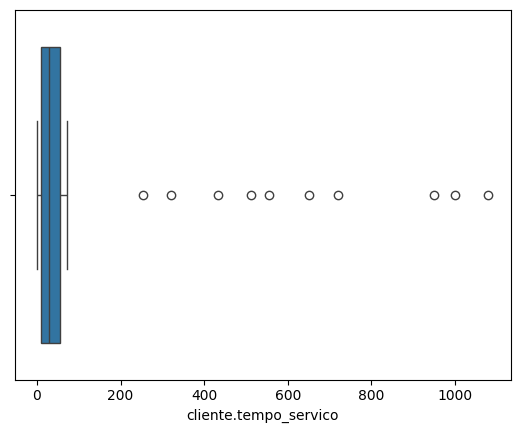

In [40]:
sns.boxplot(x=dados_svazio['cliente.tempo_servico'])

In [41]:
#calculando os limites (metodo Analise de dispersão)
q1 = dados_svazio['cliente.tempo_servico'].quantile(0.25)
q3 = dados_svazio['cliente.tempo_servico'].quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

In [42]:
#filtrando os outliers
out_filt = (dados_svazio['cliente.tempo_servico'] < lim_inf) | (dados_svazio['cliente.tempo_servico'] > lim_sup)

In [43]:
dados_svazio[out_filt]['cliente.tempo_servico']

,cliente.tempo_servico
1945,1080.0
1946,1000.0
1952,950.0
1956,254.0
1958,321.0
1963,650.0
1966,721.0
1970,555.0
1973,433.0
1974,512.0


###Substituindo os valores outliers

In [44]:
#copia de seg
df_sem_out = dados_svazio.copy()

In [45]:
df_sem_out[out_filt]['cliente.tempo_servico']

,cliente.tempo_servico
1945,1080.0
1946,1000.0
1952,950.0
1956,254.0
1958,321.0
1963,650.0
1966,721.0
1970,555.0
1973,433.0
1974,512.0


In [46]:
df_sem_out.loc[out_filt, 'cliente.tempo_servico'] = np.ceil(df_sem_out.loc[out_filt, 'conta.cobranca.Total'] / df_sem_out.loc[out_filt, 'conta.cobranca.mensal'])

<Axes: xlabel='cliente.tempo_servico'>

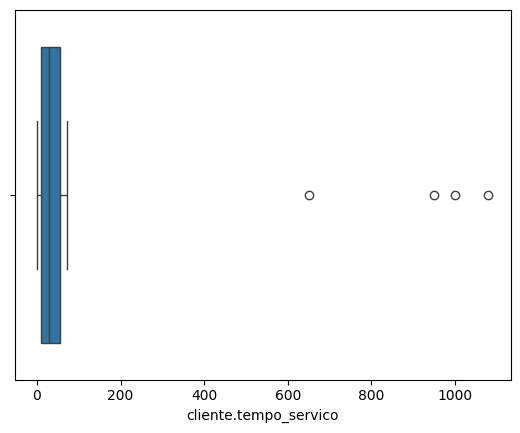

In [47]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

In [48]:
df_sem_out[out_filt][['cliente.tempo_servico','conta.cobranca.mensal','conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55


neste caso, ainda temos outliers pois, as colunas que usamos para substituir os valores também são outliers. Então o ideal é remover estes dados.

###Removendo outliers

Se os outliers forem erros de medição ou entrada de dados incorreta, é importante removê-los para que não afetem a análise estatística e a interpretação dos resultados.

In [49]:
#filtro comprometido
df_sem_out[out_filt]['cliente.tempo_servico']

,cliente.tempo_servico
1945,1080.0
1946,1000.0
1952,951.0
1956,2.0
1958,43.0
1963,650.0
1966,44.0
1970,7.0
1973,4.0
1974,1.0


In [50]:
#calculando os limites (metodo Analise de dispersão)
q1 = df_sem_out['cliente.tempo_servico'].quantile(0.25)
q3 = df_sem_out['cliente.tempo_servico'].quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr
#filtrando os outliers
out_filt = (df_sem_out['cliente.tempo_servico'] < lim_inf) | (df_sem_out['cliente.tempo_servico'] > lim_sup)
out_filt

,cliente.tempo_servico
0,False
1,False
2,False
3,False
4,False
...,...
7001,False
7002,False
7003,False
7004,False


In [51]:
df_sem_out[out_filt]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1945,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.9,112212.0
1946,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.9,45900.0
1952,2834-SPCJV,sim,masculino,0,sim,nao,951.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.1,79895.0
1963,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.0,47450.0


In [52]:
#pegando todos os dados menos os outliers
df_sem_out= df_sem_out[~out_filt]
df_sem_out

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


<Axes: xlabel='cliente.tempo_servico'>

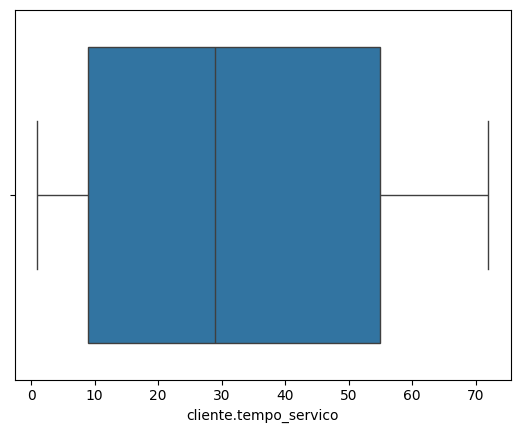

In [53]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

In [54]:
df_sem_out.reset_index(drop=True, inplace=True)

##Trabalhando com variáveis categóricas

As variáveis categóricas são um tipo de variável usado em Ciência de Dados para representar dados que podem ser classificados em diferentes categorias ou grupos. Por exemplo, se uma pessoa cientista de dados estiver analisando o desempenho acadêmico de estudantes em uma escola, ela pode usar variáveis categóricas para classificar o desempenho dessas pessoas em diferentes grupos, como "excelente", "bom" ou "regular". Isso permite identificar padrões ou tendências no desempenho.

Existem muitos exemplos de variáveis categóricas na Ciência de Dados. Algumas das mais comuns incluem a cor dos olhos, o tipo sanguíneo, a marca de um carro ou a escolaridade. Essas variáveis não possuem uma escala numérica e não podem ser medidas em termos de magnitude ou intensidade. Em vez disso, elas são usadas para classificar dados em diferentes grupos ou categorias.

Dentre os tipos de variáveis, temos:

* Variáveis categóricas nominais
São aquelas que não possuem uma ordem ou hierarquia específica entre as categorias. Por exemplo, se uma pessoa cientista de dados estiver analisando a preferência musical de um grupo de pessoas, ela pode usar variáveis categóricas nominais para classificar as pessoas em diferentes grupos, como: "rock", "jazz" ou "pop".

* Variáveis categóricas ordinais
Possuem uma ordem específica entre as categorias. Por exemplo, se a pessoa cientista de dados estiver analisando a escolaridade de um grupo de pessoas, ela pode usar esse tipo de variável para classificar as pessoas em diferentes grupos, como: "ensino fundamental completo", "ensino médio completo" ou "ensino superior completo" e assim por diante.

* Variáveis categóricas binárias
São um tipo especial de variável categórica que possui apenas duas categorias possíveis, por exemplo: sim/não, verdadeiro/falso ou presente/ausente. As variáveis categóricas binárias são úteis porque permitem que cientistas de dados analisem a distribuição de dados em apenas duas categorias possíveis.

###Substituindo valores

In [55]:
#removendo colula id_cliente
df_sem_id = df_sem_out.drop('id_cliente',axis=1).copy()

In [56]:
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


transformando as variaveis categoricas binarias:

In [57]:
#mapeando a substituição dos valores
mapeamento = {'sim': 1,
              'nao': 0,
              'masculino': 0,
              'feminino' : 1
              }

In [58]:
for col in df_sem_id.columns:
    print(f"Coluna: {col}")
    print(df_sem_id[col].unique())
    print("-" * 30)

Coluna: Churn
['nao' 'sim']
------------------------------
Coluna: cliente.genero
['masculino' 'feminino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['nao' 'sim']
------------------------------
Coluna: cliente.dependentes
['nao' 'sim']
------------------------------
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone.servico_telefone
['sim' 'nao']
------------------------------
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet.seguranca_onlin

In [59]:
#colunas que receberão o mapeamento
colunas = ['telefone.servico_telefone', 'Churn', 'cliente.parceiro', 'cliente.dependentes', 'conta.faturamente_eletronico', 'cliente.genero']

In [60]:
#mapeando os novos valores
df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)
df_sem_id

<ipython-input-60-7cec2a42fdd1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)


,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,1,0,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,1,0,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,1,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0,1,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
6998,1,0,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
6999,0,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
7000,0,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


In [61]:
for col in df_sem_id.columns:
    print(f"Coluna: {col}")
    print(df_sem_id[col].unique())
    print("-" * 30)

Coluna: Churn
[0 1]
------------------------------
Coluna: cliente.genero
[0 1]
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
[0 1]
------------------------------
Coluna: cliente.dependentes
[0 1]
------------------------------
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone.servico_telefone
[1 0]
------------------------------
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet.seguranca_online
['nao' 'sim' 'sem servico de internet']
---------

##One Hot Enconder (dummy)

O método get_dummies() da biblioteca Pandas é utilizado para transformar variáveis categóricas em variáveis binárias.

In [87]:
s = pd.Series(list('abca'))
s

,0
0,a
1,b
2,c
3,a


In [90]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


In [91]:
df_sem_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          7002 non-null   int64  
 1   cliente.genero                 7002 non-null   int64  
 2   cliente.idoso                  7002 non-null   int64  
 3   cliente.parceiro               7002 non-null   int64  
 4   cliente.dependentes            7002 non-null   int64  
 5   cliente.tempo_servico          7002 non-null   float64
 6   telefone.servico_telefone      7002 non-null   int64  
 7   telefone.varias_linhas         7002 non-null   object 
 8   internet.servico_internet      7002 non-null   object 
 9   internet.seguranca_online      7002 non-null   object 
 10  internet.backup_online         7002 non-null   object 
 11  internet.protecao_dispositivo  7002 non-null   object 
 12  internet.suporte_tecnico       7002 non-null   o

In [95]:
df_dummies = pd.get_dummies(df_sem_id).copy()
df_dummies

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,...,internet.filmes_streaming_nao,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.90,542.40,...,False,False,True,False,True,False,False,False,True,False
1,1,0,0,0,0,4.0,1,1,73.90,280.85,...,True,False,False,False,True,False,False,True,False,False
2,1,0,1,1,0,13.0,1,1,98.00,1237.85,...,False,False,True,False,True,False,False,True,False,False
3,1,1,1,1,0,3.0,1,1,83.90,267.40,...,True,False,False,False,True,False,False,False,True,False
4,0,1,0,0,1,9.0,1,1,69.40,571.45,...,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,0,55.15,742.90,...,True,False,False,False,False,True,False,False,True,False
6998,1,0,0,1,0,22.0,1,1,85.10,1873.70,...,False,False,True,False,True,False,False,True,False,False
6999,0,0,0,0,0,2.0,1,1,50.30,92.75,...,True,False,False,False,True,False,False,False,True,False
7000,0,0,0,1,1,67.0,1,0,67.85,4627.65,...,False,False,True,True,False,False,False,False,True,False


In [96]:
df_dummies.columns

Index(['Churn', 'cliente.genero', 'cliente.idoso', 'cliente.parceiro',
       'cliente.dependentes', 'cliente.tempo_servico',
       'telefone.servico_telefone', 'conta.faturamente_eletronico',
       'conta.cobranca.mensal', 'conta.cobranca.Total',
       'telefone.varias_linhas_nao',
       'telefone.varias_linhas_sem servico de telefone',
       'telefone.varias_linhas_sim', 'internet.servico_internet_DSL',
       'internet.servico_internet_fibra otica',
       'internet.servico_internet_nao', 'internet.seguranca_online_nao',
       'internet.seguranca_online_sem servico de internet',
       'internet.seguranca_online_sim', 'internet.backup_online_nao',
       'internet.backup_online_sem servico de internet',
       'internet.backup_online_sim', 'internet.protecao_dispositivo_nao',
       'internet.protecao_dispositivo_sem servico de internet',
       'internet.protecao_dispositivo_sim', 'internet.suporte_tecnico_nao',
       'internet.suporte_tecnico_sem servico de internet',
     

In [97]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Churn                                                       7002 non-null   int64  
 1   cliente.genero                                              7002 non-null   int64  
 2   cliente.idoso                                               7002 non-null   int64  
 3   cliente.parceiro                                            7002 non-null   int64  
 4   cliente.dependentes                                         7002 non-null   int64  
 5   cliente.tempo_servico                                       7002 non-null   float64
 6   telefone.servico_telefone                                   7002 non-null   int64  
 7   conta.faturamente_eletronico                                7002 non-null   int64  
 8 

#Desafios

##Desafio 1 :

Você recebeu a tarefa de normalizar o seguinte arquivo JSON chamado “informacoes.json” referente a algumas informações de identificação de um cliente.

In [62]:
json_info = requests.get('https://cdn3.gnarususercontent.com.br/2929-pandas/informacoes.json')

In [63]:
json_info = json.loads(json_info.text)

In [64]:
df_info = pd.json_normalize(json_info, record_path='enderecos',meta=['nome', 'idade'], errors='ignore')
df_info

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


##Desafio 2:

Você recebeu e fez o download o arquivo JSON chamado “dados.json”. Sua tarefa é realizar alguns tratamentos e deixar esse arquivo JSON como um Pandas DataFrame, sem dados vazios e com a tipagem das colunas de forma correta.

In [65]:
pessoas = requests.get('https://cdn3.gnarususercontent.com.br/2929-pandas/dados.json')
json_pessoas = json.loads(pessoas.text)
df_pessoas = pd.json_normalize(json_pessoas, record_path='pessoas', errors='ignore')
df_pessoas

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [66]:
df_pessoas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes


In [67]:
df_pessoas['idade'] = df_pessoas['idade'].astype(int)

In [68]:
df_pessoas.drop(df_pessoas[df_pessoas['endereco.rua'] == ''].index, inplace= True)

In [69]:
df_pessoas

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


##Desafio 3

Para facilitar a análise dos dados de cadastro de cursos de uma plataforma, você recebeu um arquivo chamado cursos_cadastrados.json. Você foi informado que esses dados podem apresentar problemas que podem prejudicar a análise e interpretação correta dos dados.

Para resolver isso, foi solicitado que você **identifique e remova as amostras** que apresentam os seguintes problemas:

* Valores nulos: são valores ausentes em algumas das colunas que devem ser preenchidos para que a análise seja correta.

* Duplicatas: registros iguais que podem prejudicar a análise dos dados, já que estão representando a mesma informação.

* Strings vazias: valores de texto que não apresentam nenhum conteúdo escrito, o que pode dificultar a análise de dados, principalmente se a coluna tiver muitos valores assim.

* Conversão de tipos: algumas colunas do arquivo podem estar no tipo de dados errado, como texto em vez de número, o que pode prejudicar a análise. Nesse caso você deve realizar a conversão para o tipo correto de cada coluna.

Dentro desse contexto, você precisará de uma abordagem sistemática para limpar os dados. Assim, como isso pode ser feito?

In [70]:
cursos = requests.get('https://cdn3.gnarususercontent.com.br/2929-pandas/cursos_cadastrados.json')
json_cursos = json.loads(cursos.text)
cursos_cadastrados = pd.json_normalize(json_cursos, errors='ignore')
cursos_cadastrados

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [71]:
cursos_cadastrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               6 non-null      object
 1   categoria           6 non-null      object
 2   carga_horaria       5 non-null      object
 3   concluintes         5 non-null      object
 4   data_inicio         5 non-null      object
 5   data_conclusao      5 non-null      object
 6   descricao           5 non-null      object
 7   preco               5 non-null      object
 8   instrutor.nome      6 non-null      object
 9   instrutor.email     6 non-null      object
 10  instrutor.telefone  6 non-null      object
dtypes: object(11)
memory usage: 656.0+ bytes


###Tratando duplicados

In [72]:
#criando filtro de duplicados
fil_dupli = cursos_cadastrados.duplicated()

In [73]:
#dados duplicados
cursos_cadastrados[fil_dupli]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [74]:
#removendo duplicados
cursos_cadastrados.drop_duplicates(inplace=True)

In [75]:
cursos_cadastrados.duplicated().sum()

0

###Tratando os vazios

In [76]:
#identificando os valores vazios
for col in cursos_cadastrados.columns:
    print(f"Coluna: {col}")
    print(cursos_cadastrados[col].unique())
    print("-" * 30)

Coluna: curso
['Introdução à programação' 'Excel para iniciantes'
 'Marketing digital para negócios' 'Inteligência artificial'
 'Inglês para negócios']
------------------------------
Coluna: categoria
['Programação' 'Produtividade' 'Marketing' 'Idiomas']
------------------------------
Coluna: carga_horaria
['20 horas' None '30 horas' '40 horas']
------------------------------
Coluna: concluintes
[100 None 75 '' 30]
------------------------------
Coluna: data_inicio
['2022-01-01' None '2022-03-01' '2022-04-01' '']
------------------------------
Coluna: data_conclusao
['2022-01-20' None '2022-03-31' '']
------------------------------
Coluna: descricao
['Curso introdutório à programação com Python' None
 'Curso introdutório em marketing'
 'Curso avançado sobre inteligência artificial com Python'
 'Curso de inglês para negócios']
------------------------------
Coluna: preco
['99.90' None 89.9 129.9 69.9]
------------------------------
Coluna: instrutor.nome
['João Silva' 'Maria Oliveira' '

In [77]:
#transformando todos os vazios em nulos
cursos_cadastrados.replace('', np.nan, inplace=True)

<ipython-input-77-60759dfd8460>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cursos_cadastrados.replace('', np.nan, inplace=True)


###Tratando os nulos

In [78]:
#contando os nulos em cada uma das colunas
cursos_cadastrados.isna().sum()

,0
curso,0
categoria,0
carga_horaria,1
concluintes,2
data_inicio,2
data_conclusao,3
descricao,1
preco,1
instrutor.nome,1
instrutor.email,1


In [79]:
cursos_cadastrados.dropna(inplace=True)

In [80]:
cursos_cadastrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   curso               2 non-null      object 
 1   categoria           2 non-null      object 
 2   carga_horaria       2 non-null      object 
 3   concluintes         2 non-null      float64
 4   data_inicio         2 non-null      object 
 5   data_conclusao      2 non-null      object 
 6   descricao           2 non-null      object 
 7   preco               2 non-null      object 
 8   instrutor.nome      2 non-null      object 
 9   instrutor.email     2 non-null      object 
 10  instrutor.telefone  2 non-null      object 
dtypes: float64(1), object(10)
memory usage: 192.0+ bytes


###Ajustando a base

In [81]:
#resetando indexes
cursos_cadastrados.reset_index(drop=True, inplace=True)

In [82]:
# Converte a concluintes para o tipo inteiro
cursos_cadastrados['concluintes'] = cursos_cadastrados['concluintes'].astype(int)

# Converte a coluna data_inicio e data_conclusao para o tipo datetime
cursos_cadastrados['data_inicio'] = pd.to_datetime(cursos_cadastrados['data_inicio'])
cursos_cadastrados['data_conclusao'] = pd.to_datetime(cursos_cadastrados['data_conclusao'])

# Convertendo a coluna preço para o tipo float
cursos_cadastrados['preco'] = cursos_cadastrados['preco'].astype(float)

In [83]:
cursos_cadastrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int64         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 304.0+ bytes


##Desafio 4

Você trabalha em um banco como cientista de dados e recebeu o seguinte conjunto de dados para analisar:

In [84]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150,
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250,
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

Foi informado que nessa base de dados há possíveis fraudes que podem ser identificadas através dos outliers no “valor da transação”. Basicamente a fraude seria um outlier.

Sua missão é construir uma função que recebe dois parâmetros, a coluna que você quer analisar se tem outlier e o DataFrame em questão. A intenção de fazer isso é aproveitar novamente essa função tanto para outras colunas quanto para outros DataFrames futuramente em outras análises. O método que deve ser implementado para identificação do outlier é do intervalo interquartil.

In [85]:
def procura_outliers(column, df):
    #Identificação dos outliers
    outliers = df[(df[column] < np.percentile(df[column], 25) - (1.5 * (np.percentile(df[column], 75) - np.percentile(df[column], 25)))) |
                  (df[column] > np.percentile(df[column], 75) + (1.5 * (np.percentile(df[column], 75) - np.percentile(df[column], 25))))]
    return outliers

In [86]:
print(procura_outliers('Valor da transação', df))

    ID da transação  Valor da transação Data da transação Local da transação
5                 6                 913        2022-01-06   Nova Iorque, EUA
16               17                 805        2022-01-17   Los Angeles, EUA
28               29                 800        2022-01-29         Miami, EUA
